In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file path
file_path = '../data/hurdat2_1851_2023.txt'

# Initialize variables
cyclone_data = []
current_cyclone = None

# Function to convert latitude and longitude to float
def convert_lat_lon(value):
    if 'N' in value or 'E' in value:
        return float(value[:-1])
    elif 'S' in value or 'W' in value:
        return -float(value[:-1])

# Read the file line by line
with open(file_path, 'r') as file:
    for line in file:
        # Check if the line starts with 'AL' indicating a new cyclone
        if line.startswith('AL'):
            if current_cyclone is not None:
                cyclone_data.append(current_cyclone)
            current_cyclone = {'header': line.strip(), 'data': []}
        else:
            if current_cyclone is not None:
                current_cyclone['data'].append(line.strip().split(','))

# Append the last cyclone
if current_cyclone is not None:
    cyclone_data.append(current_cyclone)

# Process each cyclone's data
all_cyclone_dfs = []
for cyclone in cyclone_data:
    df = pd.DataFrame(cyclone['data'], columns=['Date', 'Time', 'Record', 'Status', 'Latitude', 'Longitude', 'WindSpeed', 'Pressure',
                                                'Rad_34_NE', 'Rad_34_SE', 'Rad_34_SW', 'Rad_34_NW', 'Rad_50_NE', 'Rad_50_SE',
                                                'Rad_50_SW', 'Rad_50_NW', 'Rad_64_NE', 'Rad_64_SE', 'Rad_64_SW', 'Rad_64_NW', 'maxwnd'])
    # Convert data types where necessary
    df['Date'] = df['Date'].astype(str)
    df['Time'] = df['Time'].astype(str)
    df['Latitude'] = df['Latitude'].apply(convert_lat_lon)
    df['Longitude'] = df['Longitude'].apply(convert_lat_lon)
    df['WindSpeed'] = df['WindSpeed'].astype(int)
    df['Pressure'] = df['Pressure'].astype(int)
    df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%Y%m%d %H%M')
    df.set_index('Datetime', inplace=True)
    df['Cyclone'] = cyclone['header']  # Add a column for the cyclone identifier
    all_cyclone_dfs.append(df)

# Concatenate all cyclone dataframes into a single dataframe
all_data = pd.concat(all_cyclone_dfs)

# Move the Cyclone column to the first position
columns = ['Cyclone'] + [col for col in all_data.columns if col != 'Cyclone']
all_data = all_data[columns]

# Define the latitude and longitude range for filtering
min_lat, max_lat = 27.5, 29.4
min_lon, max_lon = -81.5, -78.8

# Filter the data based on the specified latitude and longitude range
filtered_data = all_data[(all_data['Latitude'] >= min_lat) & (all_data['Latitude'] <= max_lat) &
                         (all_data['Longitude'] >= min_lon) & (all_data['Longitude'] <= max_lon)]

# Extract one status per cyclone (e.g., the first entry)
unique_statuses = filtered_data.groupby('Cyclone').first().reset_index()

status_counts = unique_statuses['Status'].value_counts()
print(status_counts)




Status
 TS    56
 HU    35
 TD    31
 SD     4
 EX     3
 SS     2
 LO     1
Name: count, dtype: int64


In [4]:
cyclone_data[1]

{'header': 'AL021851,            UNNAMED,      1,',
 'data': [['18510705',
   ' 1200',
   '  ',
   ' HU',
   ' 22.2N',
   '  97.6W',
   '  80',
   ' -999',
   ' -999',
   ' -999',
   ' -999',
   ' -999',
   ' -999',
   ' -999',
   ' -999',
   ' -999',
   ' -999',
   ' -999',
   ' -999',
   ' -999',
   ' -999']]}

# Chart below counts storm status for our AOI 

In [35]:
percentage_first_status = status_counts.iloc[0] / status_counts.sum() * 100
first_status_percentage = "{:.0f}%".format(percentage_first_status)


'42%'

/var/folders/hz/sg34vg_92b77c_hdxw3wkl400000gn/T/ipykernel_36251/3916462117.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  axs.text(i, y[i], y[i], ha='center',


Text(0.5, 0.8, " TS occurs '42%'. of the time")

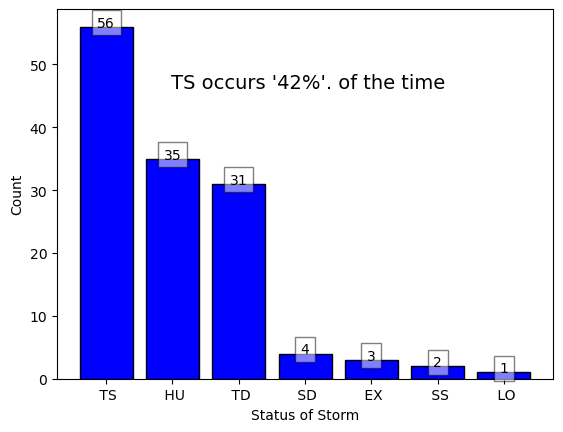

In [48]:
def addlabels(x,y):
    for i in range(len(x)):
        axs.text(i, y[i], y[i], ha='center',
                 bbox = dict(facecolor = 'white', alpha = .5))
percentage_first_status = status_counts.iloc[0] / status_counts.sum() * 100
fig, axs = plt.subplots()
axs.bar(status_counts.index, height=status_counts, color='b', edgecolor='black')
addlabels(status_counts.index, status_counts)
axs.set_xlabel('Status of Storm')
axs.set_ylabel('Count')
axs.text(0.5, 0.8, f"{status_counts.index[0]} occurs '{percentage_first_status:.0f}%' of the time",
         horizontalalignment='center',
         verticalalignment='center',
         transform=axs.transAxes,
         fontsize=14)

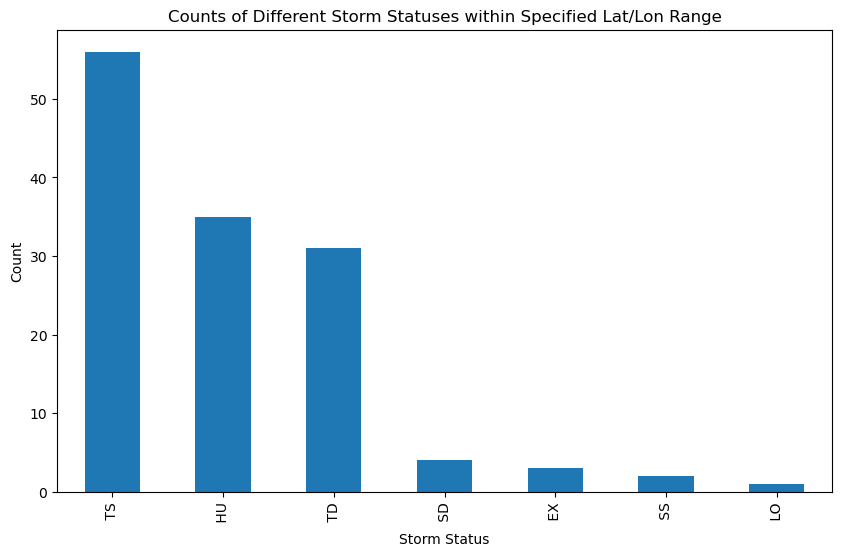

Number of unique cyclones in the filtered data: 132


In [2]:
# Plot the value counts
status_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Counts of Different Storm Statuses within Specified Lat/Lon Range')
plt.xlabel('Storm Status')
plt.ylabel('Count')
plt.text
plt.show()

# Optionally, if you want to count the number of unique cyclones in the filtered data
unique_cyclones = unique_statuses['Cyclone'].nunique()
print(f"Number of unique cyclones in the filtered data: {unique_cyclones}")
